In [8]:
import numpy as np
from scipy.integrate import odeint
from scipy import optimize
import matplotlib.pyplot as plt

In [9]:
# 1. Задаём модельную функцию системы
def model_ode(y, t, p):
    """
    y: [y, y']
    p: [a1, a0, b1, b0]
    u(t) = sin(t), u'(t) = cos(t)
    """
    y1, y2 = y
    a1, a0, b1, b0 = p
    u = np.sin(t)
    u_dot = np.cos(t)
    dy1dt = y2
    dy2dt = -a1*y2 - a0*y1 + b1*u_dot + b0*u
    return [dy1dt, dy2dt]

In [10]:
# 2. Генерируем "экспериментальные" данные
t = np.linspace(0, 10, 201)  # от 0 до 10 секунд, 201 точка
p_true = [3.0, 2.0, 3.0, 1.0]
y0_true = [0.0, 0.0]  # нулевые начальные условия
sol_true = odeint(model_ode, y0_true, t, args=(p_true,))
y_data = sol_true[:, 0]  # наблюдаемая переменная y

In [11]:
# 3. Функция невязки для оптимизации
def residuals(p):
    sol = odeint(model_ode, y0_true, t, args=(p,))
    y_sim = sol[:, 0]
    return (y_data - y_sim)

In [12]:
# 4. Оценка параметров
initial_guess = [2.5, 1.5, 2.5, 0.5]
p_est, cov_x, infodict, mesg, ier = optimize.leastsq(
    residuals, initial_guess, full_output=True)

In [13]:
# 5. Вывод результатов
print("Истинные параметры:", p_true)
print("Начальное приближение:", initial_guess)
print("Оценённые параметры:", np.round(p_est, 4))

Истинные параметры: [3.0, 2.0, 3.0, 1.0]
Начальное приближение: [2.5, 1.5, 2.5, 0.5]
Оценённые параметры: [3. 2. 3. 1.]


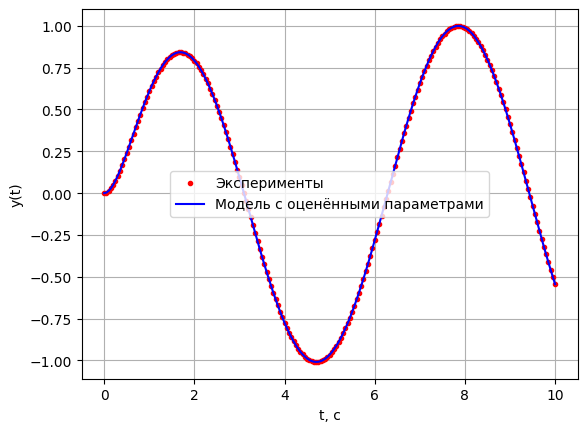

In [14]:
# 6. Сравнение результата моделирования с данными
sol_est = odeint(model_ode, y0_true, t, args=(p_est,))
y_est = sol_est[:, 0]

plt.figure()
plt.plot(t, y_data, 'r.', label='Эксперименты')
plt.plot(t, y_est, 'b-', label='Модель с оценёнными параметрами')
plt.xlabel('t, с')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()

3 Вариант

У нас уравнение имеет вид:
$$y''(t) + 3y'(t) + 2y(t) = 3u'(t)+u(t)$$

Получаем коэффициенты:
$$a_1 = 3$$
$$a_0 = 2$$
$$b_1 = 3$$
$$b_0 = 1$$

Введем новые переменные:
$$x_1(t)=y(t)$$
$$x_2(t)=y'(t)$$

Выразим y''(t):
$$y''(t) = -3y'(t) - 2y(t) + 3u'(t) + u(t)$$
$$x_2'(t) = -3x_2(t) - 2x_1(t) + 3u'(t) + u(t)$$

Отсюда получаем систему:
$$x_1'(t) = x_2(t)$$
&
$$x_2'(t) = -3x_2(t) - 2x_1(t) + 3u'(t) + u(t)$$